# Neural Network
What is neural network?


Multi-layered Perceptron (MLP)
MLP is an example of Artificial Neural Network (ANN) and the simplest MLP model has 3 layers: input, hidden and output.

Resources
https://towardsdatascience.com/deep-neural-multilayer-perceptron-mlp-with-scikit-learn-2698e77155e 


1.	Neural Network – Multi-Layered Perceptron Classifier (MLP Classifier)
We shall use MLP for classification. We would like to build an MLP Classifier model to predict the type of wine given a set of predictors.
https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/ 

Data Pre-processing
The neural network in Python may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. Note that you must apply the same scaling to the test set for meaningful results. There are a lot of different methods for normalization of data, we will use the built-in StandardScaler for standardization.

MLP Classifier
This is a supervised learning technique. 

For the first example, we are going to predict the type of iris based on the inputs for sepal length, sepal width, petal length and petal width.

Example 1.1 Type the following:


irises classes are:  ['setosa' 'versicolor' 'virginica']
The predict y value is that is the iris type  [1]


The predict y value is that is the iris type  [2]


Confusion Matrix is 
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



Confusion matrix, without normalization
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.90909091 0.09090909]
 [0.         0.         1.        ]]


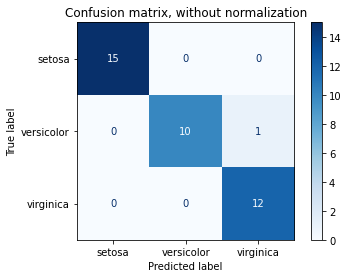

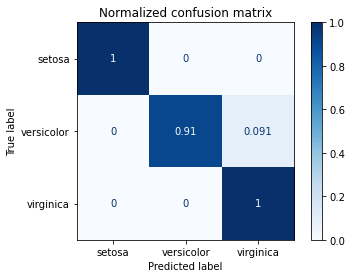

In [1]:
#https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
#Part 2 Vary the number of layers and perceptrons
#MLP Classifier for irises

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Load dataset and explore dataset
irises = datasets.load_iris()
X = irises.data
y = irises.target
class_names = irises.target_names
print("irises classes are: ", class_names)


#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create an MLP model with 4 hidden layers with varying number of perceptrons in each layer, number of iterations is 500
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)

#Fit the model
classifier = mlp.fit(X_train,y_train)

#Prediction 
y_pred = mlp.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The order of the values are
#aligned to the order of the columns
new_input = [[5, 3.2, 1.2, 0.4]]
new_y = mlp.predict(new_input)
print("The predict y value is that is the iris type ", new_y)
print("\n")

new_input2 = [[7.8, 2.5, 6.5, 1.9]]
new_y2 = mlp.predict(new_input2)
print("The predict y value is that is the iris type ", new_y2)
print("\n")


#Model Evaluation
#https://scikit-learn.org/stable/modules/model_evaluation.html
#clustering-metrics
print("Confusion Matrix is ")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Example 1.2
We are going to use the wine.txt dataset. The Wine column is the target variable (1,2 , or 3) while the rest of the columns are predictors.
The data description is as follows:
1)	Wine (Type 1, 2, 3)
2)	Alcohol
3)	Malic acid
4)	Ash
5)	Alcalinity of ash  
6)	Magnesium
7)	Total phenols
8)	Flavanoids
9)	Nonflavanoid phenols
10)	Proanthocyanins
11)	Color intensity
12)	Hue
13)	OD280/OD315 of diluted wines
14)	Proline     

Type the following to build a prediction model for wine class:


In [2]:
#https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
#Part 2 Vary the number of layers and perceptrons
#MLP Classifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

#Load dataset and explore dataset
dataset = pd.read_csv('wine.txt', delimiter = ",")
print(dataset.head())
print("\n")
print("Information about the number of records and columns ",dataset.shape)
print("\n")
print(dataset.isnull().sum())
print("\n")
print(dataset.describe().transpose())
print("\n")

#Select all columns except for Wine type as predictors and Wine type as target variable; axis = 1 refers to columns
X = dataset.drop('Wine',axis=1)
y = dataset['Wine']

#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create an MLP model with 4 hidden layers with varying number of perceptrons in each #layer, number of iterations is 500
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)

#Fit the model
mlp.fit(X_train,y_train)

#Prediction 
y_pred = mlp.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The #order of the values are
#aligned to the order of the columns
new_input = [[12, 2.2, 2.3, 19, 80, 1.5, 2.0, 0.2, 1.2, 1.2, 2.5, 1.4, 390]]
new_y = mlp.predict(new_input)
print("The predict y value is that is the wine type ", new_y)
print("\n")

#Model Evaluation
#https://scikit-learn.org/stable/modules/model_evaluation.html#clustering-metrics
print("Confusion Matrix is ")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

print("=======================================================")
print(len(mlp.coefs_))
print(mlp.coefs_)
print("\n")
print("=======================================================")
print(len(mlp.intercepts_))
print(mlp.intercepts_)
print("\n")

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


Information about the number of records and columns  (178, 14)


Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl   

In [ ]:
More Examples
https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn 
https://www.python-course.eu/neural_networks_with_scikit.php 


# 2. Neural Network – Multi-Layered Perception Regressor (MLP Regressor)

It is for non-linear model and output is continuous. Note: the sample can have more than 1 output (supported by multi-output regression). This is also a supervised learning for prediction.

Example 2.1 
We shall use the boston.txt dataset.
The data description is:
1.	crim - per capita crime rate by town
2.	zn - proportion of residential land zoned for lots over 25,000 sq.ft.
3.	indus - proportion of non-retail business acres per town.
4.	chas - charles river dummy variable (1 if tract bounds river; 0 otherwise)
5.	nox - nitric oxides concentration (parts per 10 million)
6.	rm - average number of rooms per dwelling
7.	age - proportion of owner-occupied units built prior to 1940
8.	dis - weighted distances to five boston employment centres
9.	rad - index of accessibility to radial highways
10.	tax - full-value property-tax rate per $10,000
11.	ptratio - pupil-teacher ratio by town
12.	b - 1000(bk - 0.63)^2 where bk is the proportion of blacks by town
13.	lstat - % lower status of the population
14.	medv - median value of owner-occupied homes in $1000's


We are going to use MLPRegressor to predict the median value of owner occupied homes. 
We shall use boston.txt dataset.
We shall use the following predictors (and drop columns that are struck through)
column_0: crim - per capita crime rate by town
column_1: zn - proportion of residential land zoned for lots over 25,000 sq.ft.
column_2: indus - proportion of non-retail business acres per town.
column_3: chas - charles river dummy variable (1 if tract bounds river; 0 otherwise)
column_4: nox - nitric oxides concentration (parts per 10 million)
column_5: rm - average number of rooms per dwelling
column_6: age - proportion of owner-occupied units built prior to 1940
column_7: dis - weighted distances to five boston employment centres
column_8: rad - index of accessibility to radial highways
column_9: tax - full-value property-tax rate per $10,000
column_10: ptratio - pupil-teacher ratio by town
column_11: b - 1000(bk - 0.63)^2 where bk is the proportion of blacks by town
column_12: lstat - % lower status of the population
column_13: medv - median value of owner-occupied homes in $1000's

Type the following:

In [4]:
#MLP Regressor for Predictive Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Load dataset and explore dataset
dataset = pd.read_csv('boston.csv', delimiter = ",")
print(dataset.head())
print("\n")
print("Information about the number of records and columns ",dataset.shape)
print("\n")
print(dataset.isnull().sum())
print("\n")
print(dataset.describe())
print("\n")

#Select columns except for columns[3], [6],[10], and [11] as predictors and medv as target variable; axis = 1 refers to columns
X = dataset.drop(['chas', 'age', 'ptratio', 'b'], axis=1)
y = dataset['medv']
print(X)
print("\n")
print(y)
print("\n")

#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Build and fit the Neural Network MLP Regression Model
#Detailed explanation for all the parameters are here:
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html 
nn = MLPRegressor(hidden_layer_sizes=(3), activation='relu', max_iter = 500, solver='lbfgs')
nn_model = nn.fit(X_train, y_train)

#Use the NN model to predict the target values
#Prediction 
y_pred = nn_model.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The order of the values are
#aligned to the order of the columns
new_input = [[0.5, 12.0, 0.01, 0.55, 6.00, 3.5, 9.0, 10, 300, 13]]
new_y = nn_model.predict(new_input)
print("The predict y value is that is the Median Value x $1000 ", new_y)
print("\n")


#Evaluation of the model
#https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
print("The mean squared error of the model is ", mean_squared_error(y_test, y_pred))
print("The mean absolute error of the model is ", mean_absolute_error(y_test, y_pred))
print("The R squared value of the model is ", r2_score(y_test, y_pred))
print("\n")


#Plot the scatterplots for x_test, y_test and y_pred values
#Cannot plot because the there are 10 predictors

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


Information about the number of records and columns  (506, 15)


Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv  

KeyError: "['b'] not found in axis"

Resources
https://blog.usejournal.com/going-dutch-how-i-used-data-science-to-rent-an-apartment-in-amsterdam-79b2d36f6206 

https://github.com/omoreira/GM-Python-Workbook/blob/master/NN_examples/MLP_regression_10foldcv_boston.py 

https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py 

https://towardsdatascience.com/ml-preface-2-355b1775723e 

https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/ 

https://scikit-learn.org/stable/modules/neural_networks_supervised.html#regression 

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html 

https://towardsdatascience.com/ml-preface-2-355b1775723e 

https://scikit-learn.org/stable/modules/neural_networks_supervised.html 

Partial dependency
https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py


